<a href="https://colab.research.google.com/github/wj9304081/titanic-analysis/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C%EF%BC%8301%EF%BC%9A%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Understanding

1. Import Libraries & Load Data

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
url ='https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv'
titanic_data = pd.read_csv(url,index_col='PassengerId')
titanic_data.shape

(891, 11)

In [50]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. Statistical summaries and visualisations

In [51]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<ipython-input-52-acb037de4956>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(titanic_data.corr(), vmin=-1, vmax=1, annot=True)


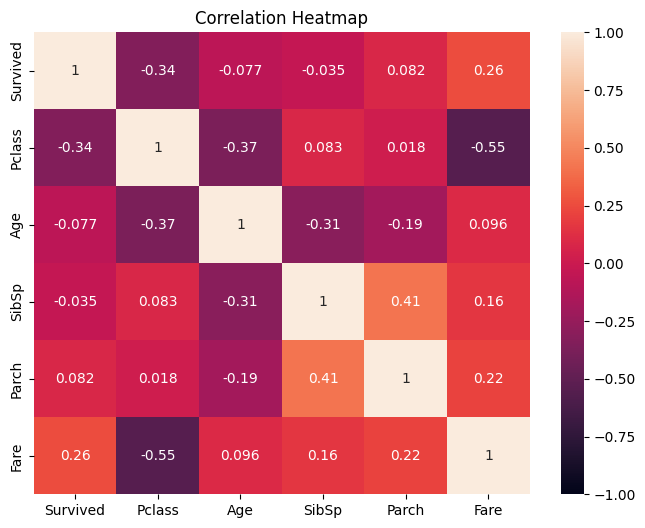

In [52]:
#Correlation
#A heat map of correlation give a understanding of which variables are important
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(titanic_data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12});

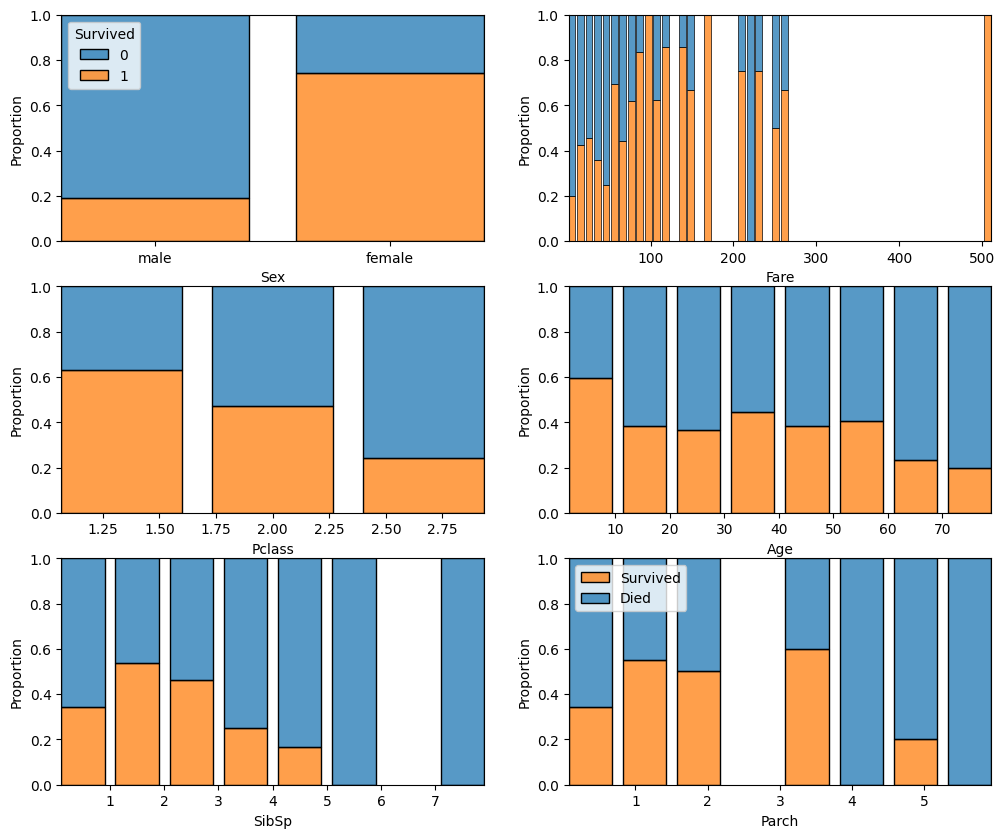

In [53]:
#Use Data Visualization to further explore the relationship between each variables and survival of passengers
#Survived: Survived (1) or died (0)
fig, axs = plt.subplots(nrows=3,ncols=2,figsize =(12,10))

sns.histplot(data = titanic_data, x='Sex', hue='Survived',bins=2,multiple='fill',stat ='proportion',shrink=0.8,ax=axs[0,0])

sns.histplot(data = titanic_data, x='Fare', hue='Survived',bins=50,multiple='fill',stat ='proportion',shrink=0.8,ax=axs[0,1],legend=False)
sns.histplot(data = titanic_data, x='Pclass',bins=3, hue='Survived',multiple='fill',stat ='proportion',shrink=0.8,ax=axs[1,0],legend=False)
sns.histplot(data = titanic_data, x='Age', hue='Survived',multiple='fill',bins=8 ,stat ='proportion',shrink=0.8,ax=axs[1,1],legend=False)
sns.histplot(data = titanic_data, x='SibSp', hue='Survived',multiple='fill', bins=8,stat ='proportion',shrink=0.8,ax=axs[2,0],legend=False)
sns.histplot(data = titanic_data, x='Parch', hue='Survived',multiple='fill', bins=8,stat ='proportion',shrink=0.8,ax=axs[2,1],legend=False)

plt.legend(loc='upper left', labels=['Survived', 'Died'])
plt.show()


In [54]:
print(titanic_data[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().round(2))
print(titanic_data[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().round(2))

      Sex  Survived
0  female      0.74
1    male      0.19
   Pclass  Survived
0       1      0.63
1       2      0.47
2       3      0.24


In [55]:
#Based on the visualization, survived or not is related to Pclass and Sex.
#The higher Pclass, the higher chance you will survive.
#Female has higher chance to survive than male.

Data Preparation

1. Transform categorical variables to numeric variables

In [56]:
#Transform categorical variables to numeric variables
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])


titanic_data_t = pd.get_dummies(titanic_data, columns=['Embarked'])

titanic_data_t.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1


2. Fill missing values in variables

In [57]:
#How many missing data points do we have?
missing_values_count = titanic_data_t.isnull().sum()
print(missing_values_count)

#Percent of data that is missing to understand the scale of the problem
total_cells = np.product(titanic_data_t.shape)
total_missing = missing_values_count.sum()
percent_missing = total_missing/total_cells
print(percent_missing)

Survived        0
Pclass          0
Name            0
Sex             0
Age           177
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin         687
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64
0.07459207459207459


In [58]:
# Fill missing values in variables
titanic_data_t.fillna(titanic_data_t.median(),inplace=True)

<ipython-input-58-298b2bfc25ad>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic_data_t.fillna(titanic_data_t.median(),inplace=True)


3. Feature Engineering - Creating new variables

In [59]:
#Remove uncessary columns
titanic_data_t.drop(columns =['Name','SibSp','Parch','Ticket','Cabin'],inplace=True)

In [60]:
df_train = titanic_data_t
columns_X = set(df_train.columns) - {'Survived'}
columns_y = ['Survived']


train_X = df_train[columns_X]
train_y = df_train[columns_y]


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
print("Cross Validationa Scores:",scores)
print("Average Score:", scores.mean())

Cross Validationa Scores: [0.78212291 0.78651685 0.78089888 0.76966292 0.79213483]
Average Score: 0.7822672776348002


<ipython-input-60-8c48065ee05b>:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_X = df_train[columns_X]
